In [ ]:
zip_address = "/content/drive/MyDrive/dataset/kagglecatsanddogs_3367a.zip"
!cp "{zip_address}" .

In [ ]:
!unzip -q kagglecatsanddogs_3367a.zip
!rm kagglecatsanddogs_3367a.zip

In [2]:
import os
import cv2
from tqdm import tqdm

CATEGORIES = ["Cat", "Dog"]
DIR = "PetImages"
SIZE = 64

datas = []

for category in CATEGORIES:
  file_path = os.path.join(DIR,category)
  value = CATEGORIES.index(category)
  for picture_name in tqdm(os.listdir(file_path)):
    picture_path = os.path.join(file_path,picture_name)
    picture = cv2.imread(picture_path, cv2.IMREAD_COLOR)
    if(picture is None):
      pass
    else:
      picture = cv2.resize(picture,(SIZE,SIZE))
      datas.append([picture,value])

100%|██████████| 12501/12501 [00:35<00:00, 354.72it/s]


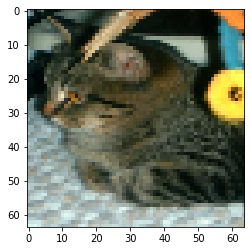

In [3]:
from matplotlib import pyplot
pyplot.imshow(cv2.cvtColor(datas[0][0], cv2.COLOR_BGR2RGB))

In [4]:
import random
random.shuffle(datas)

X = []
Y = []

for x,y in datas:
  X.append(x)
  Y.append(y)

del datas

0


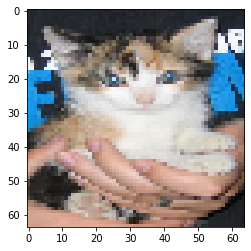

In [5]:
pyplot.imshow(cv2.cvtColor(X[2], cv2.COLOR_BGR2RGB))
print(Y[2])

In [6]:
import numpy

X = numpy.array(X).reshape(-1,SIZE,SIZE,3)
Y = numpy.array(Y).reshape(-1,1)

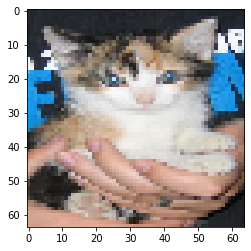

In [7]:
pyplot.imshow(cv2.cvtColor(X[2], cv2.COLOR_BGR2RGB),cmap='gray')

In [8]:
X = X / 255.0

In [9]:
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, Flatten, Dense, MaxPool2D

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=X[0].shape,activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['acc'])

mc = ModelCheckpoint('best_model.h5',save_best_only=True,monitor='val_loss',mode='min')

model.fit(X,Y,batch_size=32,epochs=50,shuffle=True,validation_split=0.2,callbacks=[mc])

Epoch 1/50
624/624 [==============================] - 43s 15ms/step - loss: 0.6595 - acc: 0.6153 - val_loss: 1.0599 - val_acc: 0.5180
Epoch 2/50
624/624 [==============================] - 9s 14ms/step - loss: 0.5067 - acc: 0.7515 - val_loss: 0.5192 - val_acc: 0.7307
Epoch 3/50
624/624 [==============================] - 9s 14ms/step - loss: 0.4212 - acc: 0.8081 - val_loss: 0.7983 - val_acc: 0.6958
Epoch 4/50
624/624 [==============================] - 9s 14ms/step - loss: 0.3711 - acc: 0.8339 - val_loss: 0.4192 - val_acc: 0.8020
Epoch 5/50
624/624 [==============================] - 9s 15ms/step - loss: 0.3175 - acc: 0.8634 - val_loss: 0.4181 - val_acc: 0.8062
Epoch 6/50
624/624 [==============================] - 9s 14ms/step - loss: 0.2804 - acc: 0.8837 - val_loss: 0.5403 - val_acc: 0.8052
Epoch 7/50
624/624 [==============================] - 9s 15ms/step - loss: 0.2382 - acc: 0.8995 - val_loss: 1.9156 - val_acc: 0.6240
Epoch 8/50
624/624 [==============================] - 9s 14ms/step -

0.8362725377082825


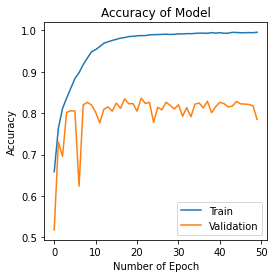

In [10]:
from matplotlib import pyplot

pyplot.figure(figsize=(4,4))
pyplot.plot(model.history.history['acc'])
pyplot.plot(model.history.history['val_acc'])
pyplot.title('Accuracy of Model')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Number of Epoch')
pyplot.legend(['Train','Validation'], loc='lower right')
pyplot.savefig('schema.png',dpi=300)
print(max(model.history.history['val_acc']))

In [11]:
model.save('model.h5')

In [12]:
from tensorflow.keras.models import load_model
model_b = load_model('best_model.h5')

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y,model_b.predict(X).round()))
print(classification_report(Y,model_b.predict(X).round()))

[[10382  2094]
 [ 1501 10969]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     12476
           1       0.84      0.88      0.86     12470

    accuracy                           0.86     24946
   macro avg       0.86      0.86      0.86     24946
weighted avg       0.86      0.86      0.86     24946



In [ ]:
print("model_b".predict(X)[1])
pyplot.imshow(numpy.column_stack(X[1]),cmap='gray')